## Aula 04 -- Projeto | Parte 1
    https://www.youtube.com/watch?v=5sVxwXEHx2g&t=206s

In [68]:
import requests as r

In [69]:
url = "https://api.covid19api.com/country/brazil"
resp = r.get(url)

In [70]:
resp.status_code

200

In [87]:
raw_data = resp.json()
raw_data[0]
# sera que aqui ele vai me corrigir

{'ID': '82bb182c-e73f-41d1-a634-58e23d0875c2',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 0,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 0,
 'Date': '2020-01-22T00:00:00Z'}

In [85]:
confirmado = 0
mortos = 1
recuperados  = 2
ativos = 3
data = 4

In [104]:
final_data = []
for values in raw_data:
    final_data.append( [values['Confirmed'],values['Deaths'],values['Recovered'],values['Active'],values['Date']] )
final_data.insert(0, ["confirmado","mortos","recuperados","ativos","data"])
final_data

[['confirmado', 'mortos', 'recuperados', 'ativos', 'data'],
 [0, 0, 0, 0, '2020-01-22T00:00:00Z'],
 [0, 0, 0, 0, '2020-01-23T00:00:00Z'],
 [0, 0, 0, 0, '2020-01-24T00:00:00Z'],
 [0, 0, 0, 0, '2020-01-25T00:00:00Z'],
 [0, 0, 0, 0, '2020-01-26T00:00:00Z'],
 [0, 0, 0, 0, '2020-01-27T00:00:00Z'],
 [0, 0, 0, 0, '2020-01-28T00:00:00Z'],
 [0, 0, 0, 0, '2020-01-29T00:00:00Z'],
 [0, 0, 0, 0, '2020-01-30T00:00:00Z'],
 [0, 0, 0, 0, '2020-01-31T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-01T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-02T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-03T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-04T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-05T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-06T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-07T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-08T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-09T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-10T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-11T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-12T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-13T00:00:00Z'],
 [0, 0, 0, 0, '2020-02-14T00:00:00Z'],
 [0,

In [109]:
for i in range(1,len(final_data)):
    final_data[i][data] = final_data[i][data][:10]
final_data

[['confirmado', 'mortos', 'recuperados', 'ativos', 'data'],
 [0, 0, 0, 0, '2020-01-22'],
 [0, 0, 0, 0, '2020-01-23'],
 [0, 0, 0, 0, '2020-01-24'],
 [0, 0, 0, 0, '2020-01-25'],
 [0, 0, 0, 0, '2020-01-26'],
 [0, 0, 0, 0, '2020-01-27'],
 [0, 0, 0, 0, '2020-01-28'],
 [0, 0, 0, 0, '2020-01-29'],
 [0, 0, 0, 0, '2020-01-30'],
 [0, 0, 0, 0, '2020-01-31'],
 [0, 0, 0, 0, '2020-02-01'],
 [0, 0, 0, 0, '2020-02-02'],
 [0, 0, 0, 0, '2020-02-03'],
 [0, 0, 0, 0, '2020-02-04'],
 [0, 0, 0, 0, '2020-02-05'],
 [0, 0, 0, 0, '2020-02-06'],
 [0, 0, 0, 0, '2020-02-07'],
 [0, 0, 0, 0, '2020-02-08'],
 [0, 0, 0, 0, '2020-02-09'],
 [0, 0, 0, 0, '2020-02-10'],
 [0, 0, 0, 0, '2020-02-11'],
 [0, 0, 0, 0, '2020-02-12'],
 [0, 0, 0, 0, '2020-02-13'],
 [0, 0, 0, 0, '2020-02-14'],
 [0, 0, 0, 0, '2020-02-15'],
 [0, 0, 0, 0, '2020-02-16'],
 [0, 0, 0, 0, '2020-02-17'],
 [0, 0, 0, 0, '2020-02-18'],
 [0, 0, 0, 0, '2020-02-19'],
 [0, 0, 0, 0, '2020-02-20'],
 [0, 0, 0, 0, '2020-02-21'],
 [0, 0, 0, 0, '2020-02-22'],
 [0, 0, 0, 0

In [107]:
import datetime as dt
print(dt.time(12, 6, 21, 7), 'Hora:minuto: segundo.microsegundo')
print('----')
print(dt.date(2020, 4, 25),'Ano-mês-dia')
print('----')
print(dt.datetime(2020, 4, 25, 12, 6, 21, 7), 'Ano-mês-dia Hora:minuto: segundo.microsegundo')

12:06:21.000007 Hora:minuto: segundo.microsegundo
----
2020-04-25 Ano-mês-dia
----
2020-04-25 12:06:21.000007 Ano-mês-dia Hora:minuto: segundo.microsegundo


In [111]:
natal = dt.date(2021, 12, 25)
reveillon = dt.date(2022, 1, 1)

print(reveillon - natal)
print((reveillon - natal).days)
print((reveillon - natal).seconds)
print((reveillon - natal).microseconds)


7 days, 0:00:00
7
0
0


In [110]:
for i in range( 1,len(final_data )):
    final_data[i][data] = dt.datetime.strptime(final_data[i][data], '%Y-%m-%d')
final_data


[['confirmado', 'mortos', 'recuperados', 'ativos', 'data'],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 22, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 23, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 24, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 25, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 26, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 27, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 28, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 29, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 30, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 1, 31, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 2, 1, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 2, 2, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 2, 3, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 2, 4, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 2, 5, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 2, 6, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 2, 7, 0, 0)],
 [0, 0, 0, 0, datetime.datetime(2020, 2, 8, 0,

In [74]:
import csv
with open("brasil-covid-novo.csv","w") as file:
    escritor = csv.writer(file)
    escritor.writerows(final_data)

### Aula 05 -- Projeto | Parte 2
    https://youtu.be/O9L13QzpgEg

In [75]:
def get_datasets (y, labels):
    if type(y[0]) == list:
        datasets = []
        for index in range( len(y) ) :
            datasets.append({
                'label' : labels[index],
                'data' : y[index]
            })
        return datasets
    else:
        return [{
            'label': labels [0],
            'data': y
        }]

In [76]:
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }


In [77]:
def create_chart (x, y, labels, kind='bar', title=" "):

    datasets = get_datasets (y, labels)
    options = set_title (title)
    chart = {
        'type': kind,
        'data': {
            'labels' : x,
            'datasets': datasets,
            'options': options
        }
    }
    return chart

In [78]:
def get_api_chart(chart):
    url_base ='https://quickchart.io/chart'
    rs = r.get(f'{url_base}?c={str(chart)} ')
    return rs.content

In [79]:
def save_image(path, content):
    with open(path, "wb") as image:
        image.write(content)

In [80]:
from PIL import Image
from IPython.display import display

In [113]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

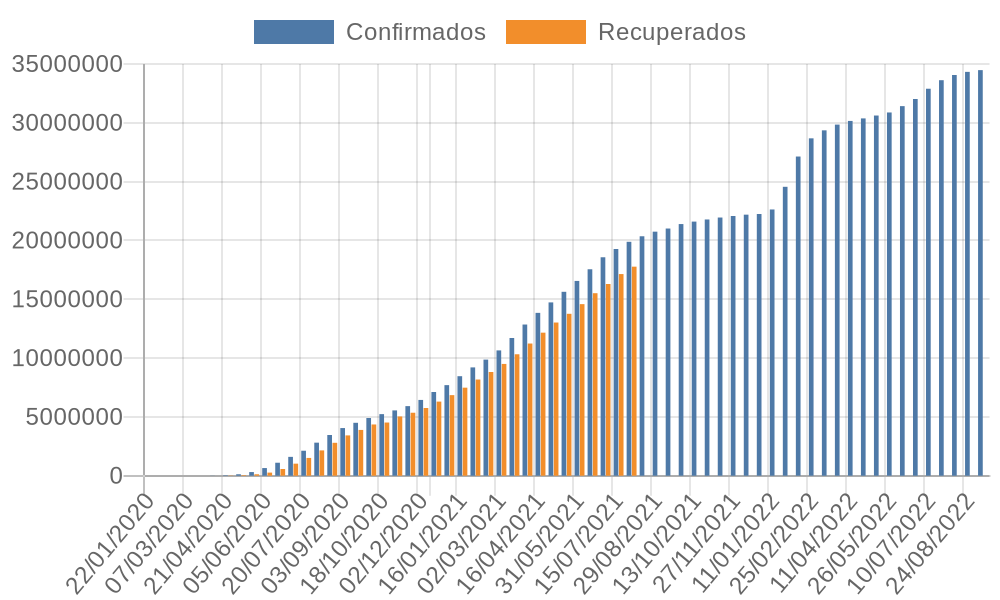

In [138]:
y_data_1 = []
a_cada_dais = 15
for obs in final_data[1::a_cada_dais]:
    y_data_1.append(obs[confirmado])

y_data_2 = []
for obs in final_data[1::a_cada_dais]:
    y_data_2.append(obs[recuperados])
    labels = ('Confirmados', 'Recuperados')

x = []
for obs in final_data[1::a_cada_dais]:
    x.append( obs[data].strftime('%d/%m/%Y') )

chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico confirmados vs recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

In [131]:
from urllib.parse import quote

In [136]:
def get_api_qrCode(link):
    text = quote(link) # parsing do link para url
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

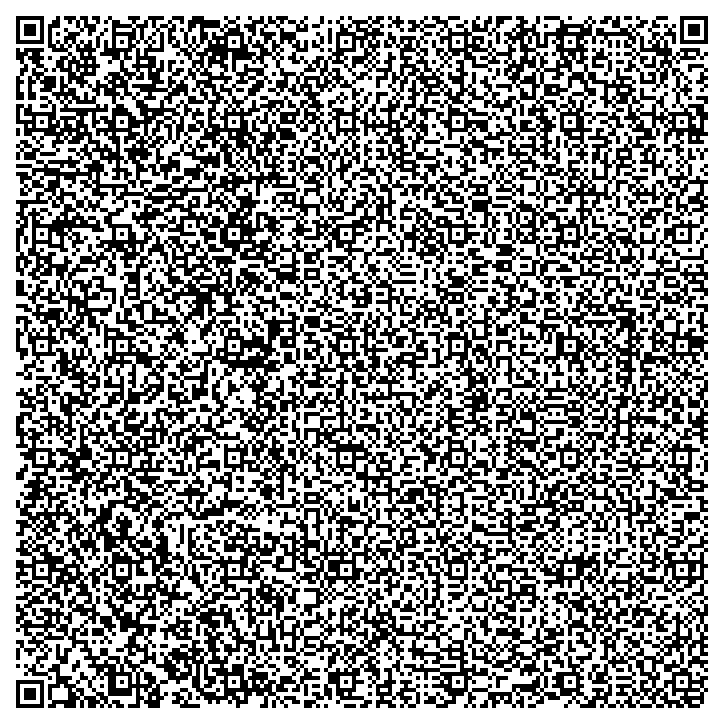

In [139]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrCode(link))
display_image('qr-code.png')

In [141]:
print('Início do programa')
cpf = int(input('Digite seu CPF: '))
cpf_raiz = cpf//100
cpf_digito = cpf%100
print(cpf_raiz, cpf_digito)


Início do programa
11111111 11


In [144]:
numero = int(input('digite o numero'))
if (numero == 0):
    print('É zero')
elif (numero > -10):
    print('É maior do que -10')
else:
    print('É menor ou igual a -10')



É menor ou igual a -10


In [151]:
i = 1000
soma = 0
while i <1000:
    soma = soma + i
    i = i - 1
print(i)

1000


In [154]:
for i in range(0):
    print(i)
    i = i + 1

In [155]:
def funcao(i):
    if i < 0:
        print(i)
        return 0
    else:
        funcao(i + 1)
funcao(10)

RecursionError: maximum recursion depth exceeded in comparison

In [156]:
def funcao(i):
    if i > 100:
        return 0
    return funcao(i + 1)
funcao(10)

0

In [157]:
A = input('Digite um número: ')
B = input('Digite outro número, maior que o primeiro: ')

aux = A
soma = 0

while aux < B:
    soma = soma + aux
    aux = aux + 1

print(soma)

RecursionError: maximum recursion depth exceeded in comparison